# Linear Regression with Eager API

A linear regression implemented using TensorFlow's Eager API.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/Users/idaly666/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/Users/idaly666/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/idaly666/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/Users/idaly666/anaconda2/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g,

In [3]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

/Users/idaly666/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/Users/idaly666/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _stats
/Users/idaly666/anaconda2/lib/python2.7/site-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/Users/idaly666/anaconda2/lib/python2.7/site-packages/sklearn/utils/extmath.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fast import csr_row_norms
/Users/idaly666/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:23: R

In [4]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [5]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [6]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

Initial cost= 94.297653198 W= -1.6958971 b= -0.017987253
Epoch: 0001 cost= 28.424455643 W= -0.78260946 b= 0.11149241
Epoch: 0100 cost= 0.090644278 W= 0.31803128 b= 0.32808107
Epoch: 0200 cost= 0.087686375 W= 0.31043747 b= 0.3819177
Epoch: 0300 cost= 0.085366391 W= 0.3037122 b= 0.42959696
Epoch: 0400 cost= 0.083546758 W= 0.29775608 b= 0.47182316
Epoch: 0500 cost= 0.082119510 W= 0.29248115 b= 0.50921994
Epoch: 0600 cost= 0.081000097 W= 0.28780952 b= 0.5423396
Epoch: 0700 cost= 0.080122083 W= 0.28367224 b= 0.5716711
Epoch: 0800 cost= 0.079433426 W= 0.28000814 b= 0.59764796
Epoch: 0900 cost= 0.078893289 W= 0.27676308 b= 0.620654
Epoch: 1000 cost= 0.078469642 W= 0.2738892 b= 0.64102846


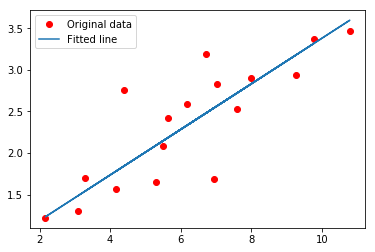

In [7]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()